<a href="https://colab.research.google.com/github/FuturisticLover123/labs/blob/main/lab9/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [409]:
#task1

In [479]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
x, y = make_regression(n_samples=10, n_features=10, noise=20, n_informative=2)

In [480]:
pca = PCA(n_components=5)
pca.fit_transform(x)

array([[ 0.47681525, -1.94537703, -1.64063348,  0.84248548,  0.47185579],
       [-0.15708581,  2.07199852,  0.76020445,  1.64002001, -0.14749135],
       [ 3.71522232,  0.06292516, -0.13396419, -0.21947977, -1.00144421],
       [ 0.09259989,  1.07512768, -0.51232421, -0.15921064,  0.13254664],
       [-0.66425009, -1.68005173, -0.77732392,  0.09458926, -0.08903797],
       [-0.04312613,  0.93390033,  0.44085791,  0.73054022,  0.80116823],
       [-1.44862303, -2.19742962,  2.01125301,  0.28066349, -0.59329312],
       [ 0.2276041 ,  0.32880113,  1.1560347 , -1.48755519,  0.25277176],
       [ 0.34209992,  0.00586508,  0.09915014, -0.98864622,  1.02589465],
       [-2.54125642,  1.34424048, -1.4032544 , -0.73340663, -0.85297044]])

In [481]:
class PCA:
  def fit(self, x, y):
    centered = x - np.mean(x, axis = 0)
    A = (1 / (x.shape[0] - 1)) * centered.T @ centered
    eigenvalues, eigenvectors = np.linalg.eig(A)
    sorted_indices = np.argsort(eigenvalues)[::-1]

    self.c = eigenvalues[sorted_indices]
    self.vectors = eigenvectors[:, sorted_indices].T
    self.cs = np.cumsum(self.c / np.sum(self.c))
    return self

  def transform(self, x, components: int =None, p = 0.95):
    if components is not None:
      return (x - np.mean(x, axis=0)) @ self.vectors[:components].T
    return (x - np.mean(x, axis=0)) @ self.vectors[:np.argmax(self.cs > p)].T

  def picture(self, p=0.95):
    plt.plot(np.arange(1, len(self.cs) + 1), self.cs, marker='o', linestyle='-', color='b')
    plt.axhline(y=p, color='r', linestyle='-')
    plt.grid(True)
    plt.show()


In [482]:
pca = PCA().fit(x, y)
pca.transform(x, components=5)

array([[-0.47681525,  1.94537703,  1.64063348,  0.84248548, -0.47185579],
       [ 0.15708581, -2.07199852, -0.76020445,  1.64002001,  0.14749135],
       [-3.71522232, -0.06292516,  0.13396419, -0.21947977,  1.00144421],
       [-0.09259989, -1.07512768,  0.51232421, -0.15921064, -0.13254664],
       [ 0.66425009,  1.68005173,  0.77732392,  0.09458926,  0.08903797],
       [ 0.04312613, -0.93390033, -0.44085791,  0.73054022, -0.80116823],
       [ 1.44862303,  2.19742962, -2.01125301,  0.28066349,  0.59329312],
       [-0.2276041 , -0.32880113, -1.1560347 , -1.48755519, -0.25277176],
       [-0.34209992, -0.00586508, -0.09915014, -0.98864622, -1.02589465],
       [ 2.54125642, -1.34424048,  1.4032544 , -0.73340663,  0.85297044]])

In [483]:
#task2

In [484]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [485]:
x2c = PCA().fit(x, y).transform(x, components=2)
LogisticRegression().fit(x2c, y).score(x2c, y)

0.9666666666666667

In [486]:
x3c = PCA().fit(x, y).transform(x, components=3)
LogisticRegression().fit(x3c, y).score(x3c, y)

0.9733333333333334

In [487]:
x1c = PCA().fit(x, y).transform(x, components=1)
LogisticRegression().fit(x1c, y).score(x1c, y)

0.94

In [488]:
#task3

In [489]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [490]:
pca = PCA().fit(X, y)

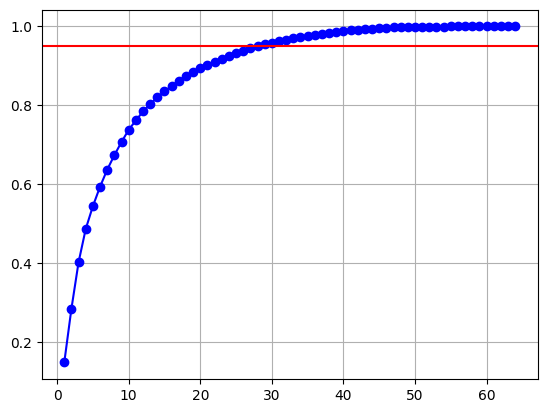

In [492]:
pca.picture()

In [493]:
transformed = pca.transform(X, components=10)
LogisticRegression().fit(transformed, y).score(transformed, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9532554257095158

In [494]:
transformed = pca.transform(X, components=5)
LogisticRegression().fit(transformed, y).score(transformed, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8569838619922092